In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from collections import defaultdict
from pathlib import Path

In [4]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

used_run_majors = ['base_simple', 'base_words', '_to_']


In [5]:
# load_folder = base_location / Path(r'Figure_6_g1')
# h5_beta_locations = str((load_folder / Path(r'all/glu_run_*/coefs/*_best_coeffs.h5')).resolve())

# out_folder = base_location / Path(r'final_outputs_glu_run')

In [6]:
h5_lst = defaultdict(list)
run_id_dct = defaultdict(list)

# base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old')

fig_folder_lst = [# ('Figure_1_2', 'f1*-ft'),
#                   ('Figure_3',   'f3*-ft'),
#                   ('Figure_4_g1',   'f4*-ft'),
#                   ('Figure_4_g2',   'f4*-ft'),
#                   ('Figure_5_g1',   'f5*-ft'),
#                   ('Figure_5_g2',   'f5*-ft'),
#                   ('Figure_5_g5',   'f5*-ft'),
#                    ('Figure_6_g1', 'glu_run_20221202-no-CO_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-reduc_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-paperfig_0-ft')
#                    ('Figure_6_g1-20sft', 'glu_run_20221212-20sft-paperfig_0-ft')
#                    ('Figure_6_g1-50sft', 'glu_run_20221213-50sft-paperfig_0-ft')
#                    ('Figure_6_g1--20_20sft', 'glu_run_20220109--20_20sft_0-ft')
                   ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_0-ft'),
                   ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_1-ft')
                 ]

for fig_folder in fig_folder_lst:
    print('fig_folder', fig_folder)
    
    load_folder = base_location / Path(fig_folder[0])
    # load_folder = base_location / Path(r'tmp')
    h5_beta_locations = str((load_folder / Path('all') / Path(fig_folder[1]) / Path(r'coefs\*_best_coeffs.h5')).resolve())
    
    
    print(h5_beta_locations)
    


#     base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

#     load_folder = base_location / Path(r'Figure_1_2')
#     h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_3')
#     # h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

#     out_folder = base_location / Path(r'final_outputs')

#     # h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
#     out_loc = str((out_folder).resolve())
#     h5_beta_locations = glob.glob(h5_beta_locations)


    subloc_out = Path(f'final_out_{fig_folder[1]}')
    out_folder = base_location / subloc_out

    out_loc = str((out_folder).resolve())
    h5_beta_locations = glob.glob(h5_beta_locations)

    fh.create_folder_if_not_exists(out_loc)
    
    h5_lst = defaultdict(list)
    for h5_coef_fn in h5_beta_locations:
        h5f = pd.HDFStore(h5_coef_fn)
        h5fk = h5f.keys()
        for key in h5fk:
#             print(key)
            resp = key.split('_')[0].replace('/', '')
            model_version = '_'.join(key.split('_')[2:]).split('_run_num')[0]
            model_version = model_version.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
    #         print(resp, model_version)
            h5_df = pd.read_hdf(h5f, key).reset_index()
            
#             display(h5fk)
            
            h5_df['fn'] = h5_coef_fn
            h5_df['key'] = key
            h5_df = h5_df.set_index(['fn','key'])


            h5_df = h5_df.sort_values('channel_name')
            h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
            h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])

            h5_lst[(resp, model_version)].append(h5_df)
    #         h5_lst.append(h5_df)
    # concat = pd.concat(h5_lst, axis=0)

    fh.create_folder_if_not_exists(out_loc)



    a = None
    b = None

    h5_dfs = dict(h5_lst)
    for key in h5_dfs:
        run_major = '='.join(key)

        cont = True
        for runmajor in used_run_majors:
            if runmajor in run_major:
                cont = False
        if cont:
            continue

        val = h5_dfs[key]
        concat = pd.concat(val)

        all_kernels = []
        for base_key in base_keys:
            all_kernels += dfh.get_kernel_from_basename(base_key, list(concat.columns))


        gb_columns = ['mouse_id', 'channel', 'name']
        ak_unagg = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[all_kernels]

        ak_unagg.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels_raw-{run_major}.csv').resolve()))

        kernels = ak_unagg.groupby(gb_columns).agg([np.mean, np.size, np.std])
        kernels = kernels.swaplevel(axis=1)

        ak = concat[all_kernels].copy()
        new_cols = [(dfh.shorten_col_name(_.split('_')[0]), int(_.split('_')[1])) for _ in ak.columns]



        ak.columns = pd.MultiIndex.from_tuples(new_cols)
        ak['1'] = 1
        akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
        akgb.loc['sem'] = akgb.loc['std']/np.sqrt(akgb.loc['size'])
    #     akgb = akgb.loc[['mean', 'sem']]
        final_out = akgb.stack(1).unstack(0).copy()
        final_out.columns = ['_'.join(_) for _ in final_out.columns]

    #     if a is None:
    #         a = final_out
    #     else:
    #         b = final_out
    #         break

    #     print(final_out.shape)
        final_out.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels-{run_major}.csv').resolve()))
        
#         display(final_out)

    #     break

fig_folder ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_0-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_7_g1--20_20sft\all\tet_run_20230403--20_20sft_0-ft\coefs\*_best_coeffs.h5


C:\Users\Josh\AppData\Local\Temp\ipykernel_19548\3060886038.py:135: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
C:\Users\Josh\AppData\Local\Temp\ipykernel_19548\3060886038.py:135: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


fig_folder ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_1-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_7_g1--20_20sft\all\tet_run_20230403--20_20sft_1-ft\coefs\*_best_coeffs.h5


In [7]:
final_out

,CI_mean,CI_sem,CI_size,CI_std,CO_mean,CO_sem,CO_size,CO_std,SIAA_mean,SIAA_sem,...,SIab_size,SIab_std,SO_mean,SO_sem,SO_size,SO_std,spnnrOff_mean,spnnrOff_sem,spnnrOff_size,spnnrOff_std
-20,-0.137197,0.006512,10.0,0.020591,-0.067175,0.005343,10.0,0.016895,-0.017482,0.006851,...,10.0,0.118254,0.018931,0.003419,10.0,0.010813,-0.142432,0.014803,10.0,0.046811
-19,-0.182080,0.006199,10.0,0.019603,-0.079253,0.004768,10.0,0.015076,0.052026,0.007827,...,10.0,0.143677,-0.001836,0.004676,10.0,0.014787,-0.113483,0.020639,10.0,0.065265
-18,-0.159485,0.006681,10.0,0.021127,-0.106068,0.004537,10.0,0.014348,0.162809,0.005922,...,10.0,0.175251,-0.012561,0.005736,10.0,0.018139,-0.117455,0.019909,10.0,0.062958
-17,-0.121891,0.007696,10.0,0.024338,-0.123758,0.004364,10.0,0.013799,0.196937,0.005104,...,10.0,0.146474,-0.014549,0.004910,10.0,0.015527,-0.120257,0.027999,10.0,0.088541
-16,-0.114918,0.004605,10.0,0.014561,-0.113871,0.005681,10.0,0.017963,0.207402,0.007160,...,10.0,0.120886,-0.016951,0.004697,10.0,0.014852,-0.110598,0.036786,10.0,0.116329
-15,-0.074924,0.004483,10.0,0.014177,-0.130370,0.006356,10.0,0.020101,0.237632,0.009961,...,10.0,0.128313,-0.034516,0.004297,10.0,0.013588,-0.099196,0.024363,10.0,0.077041
-14,-0.037052,0.007670,10.0,0.024253,-0.124141,0.005906,10.0,0.018677,0.297362,0.008121,...,10.0,0.129435,-0.049908,0.002571,10.0,0.008130,-0.134204,0.026380,10.0,0.083419
-13,-0.048511,0.008255,10.0,0.026106,-0.122154,0.007570,10.0,0.023937,0.372844,0.008923,...,10.0,0.119276,-0.065390,0.002668,10.0,0.008438,0.021360,0.023324,10.0,0.073756
-12,-0.061379,0.008793,10.0,0.027805,-0.130115,0.010079,10.0,0.031872,0.424296,0.011359,...,10.0,0.131215,-0.057096,0.003326,10.0,0.010518,0.023033,0.025624,10.0,0.081030
-11,-0.064547,0.011405,10.0,0.036065,-0.146146,0.009996,10.0,0.031609,0.438540,0.011268,...,10.0,0.127522,-0.083182,0.004182,10.0,0.013224,-0.017450,0.024670,10.0,0.078014


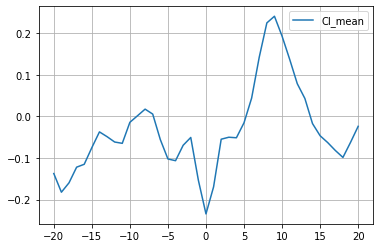

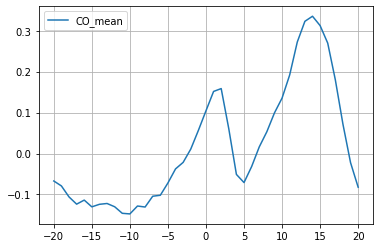

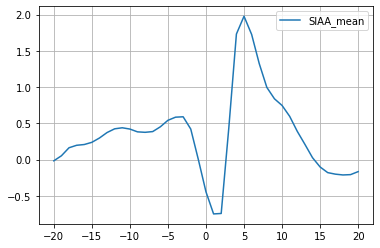

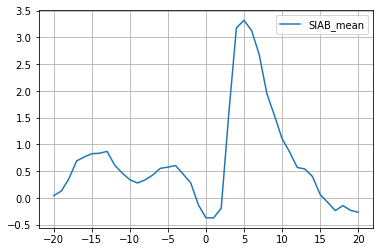

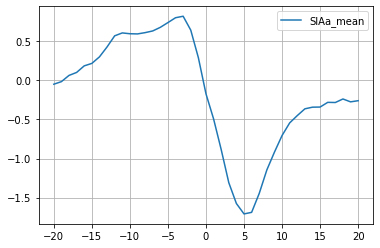

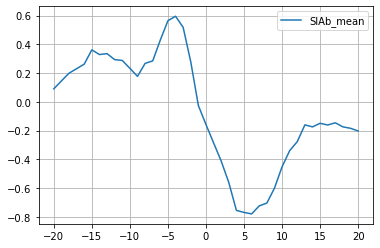

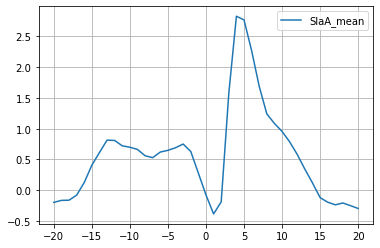

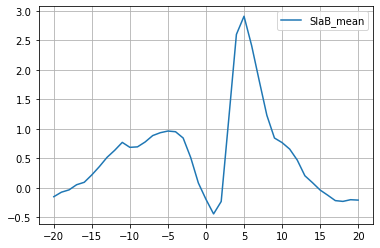

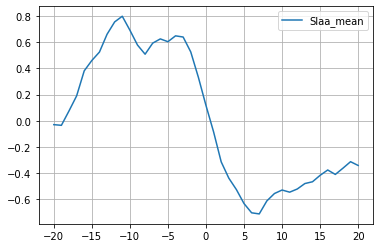

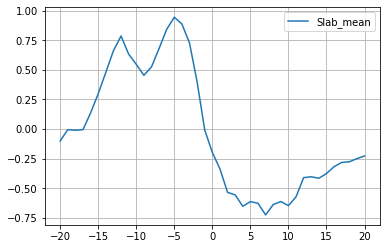

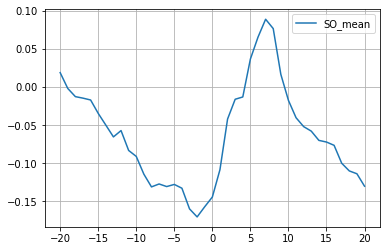

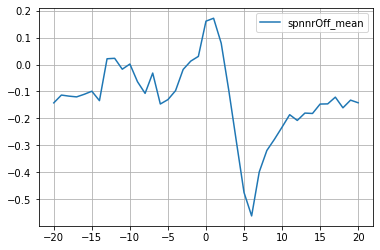

In [8]:
import matplotlib.pyplot as plt
for foc in final_out.columns:
    if 'mean' in foc:
        plt.figure()
        final_out[foc].plot(label=foc)
        plt.legend()
        plt.grid()